In [1]:
pip install --upgrade scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 96.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.7.0 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U scikit-learn imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 102.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.0
    Uninstalling scikit-learn-1.7.0:
      Successfully uninstalled scikit-learn-1.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# 1. Load dataset
df = pd.read_csv("/kaggle/input/work-dataset/ready_fraud_detection_dataset.csv")

# 2. Create numeric label
df['label'] = df['fraudulent'].map({'f': 0, 't': 1})

# 3. Drop any rows with missing full_text (just in case)
df = df.dropna(subset=['full_text'])

# 4. Train-test split (70:30)
X = df['full_text']
y = df['label']

test_size = 0.15
val_size = 0.15
train_size = 0.70
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=val_size/(train_size + val_size), stratify=y_temp, random_state=42)



In [4]:
df

,full_text,fraudulent,label
0,marketing intern were food52 and weve created ...,f,0
1,customer service cloud video production 90 sec...,f,0
2,commissioning machinery assistant cma valor se...,f,0
3,account executive washington dc our passion fo...,f,0
4,bill review manager spotsource solutions llc i...,f,0
...,...,...,...
17875,account director distribution vend is looking ...,f,0
17876,payroll accountant weblinc is the ecommerce pl...,f,0
17877,project cost control staff engineer cost contr...,f,0
17878,graphic designer nemsia studios is looking for...,f,0


In [5]:
# Debugging Block

print("DEBUGGING CHECKS")
print("Total rows in original df:", len(df))
print("NaNs in full_text:", df['full_text'].isna().sum())
print("Class distribution in full dataset:\n", df['label'].value_counts())
print("Size of X_train:", len(X_train))
print("Size of y_train:", len(y_train))
print("Size of X_test:", len(X_test))
print("Size of y_test:", len(y_test))
print("Size of X_val:", len(X_val))
print("Size of y_val:", len(y_val))

# Check for NaNs in training data
print("NaNs in X_train:", X_train.isna().sum())
print("NaNs in y_train:", y_train.isna().sum())

# Optional: Check if X_train has any empty strings
empty_text_count = (X_train.str.strip() == "").sum()
print("Empty string entries in X_train:", empty_text_count)

# Sanity check: X_train must not be empty
assert len(X_train) > 0, "X_train is EMPTY!"
assert X_train.isna().sum() == 0, "X_train contains NaNs!"

DEBUGGING CHECKS
Total rows in original df: 17880
NaNs in full_text: 0
Class distribution in full dataset:
 label
0    17014
1      866
Name: count, dtype: int64
Size of X_train: 12516
Size of y_train: 12516
Size of X_test: 2682
Size of y_test: 2682
Size of X_val: 2682
Size of y_val: 2682
NaNs in X_train: 0
NaNs in y_train: 0
Empty string entries in X_train: 0


In [6]:
# pip install transformers scikit-learn imbalanced-learn
# from transformers import BertTokenizer, BertModel
# import torch
# import numpy as np
# from tqdm import tqdm

# # Load BERT tokenizer and model (uncased base)
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# bert = BertModel.from_pretrained('bert-base-uncased')
# bert.eval()  # No training

# # Function to get BERT embeddings (CLS token)
# def get_bert_embeddings(texts, max_len=128):
#     embeddings = []
#     with torch.no_grad():
#         for text in tqdm(texts):
#             inputs = tokenizer(text, padding='max_length', truncation=True,
#                                max_length=max_len, return_tensors='pt')
#             outputs = bert(**inputs)
#             cls_embedding = outputs.last_hidden_state[0][0]  # CLS token
#             embeddings.append(cls_embedding.numpy())
#     return np.array(embeddings)

# # Apply to your train/val/test sets
# X_train_embed = get_bert_embeddings(X_train)
# X_val_embed = get_bert_embeddings(X_val)
# X_test_embed = get_bert_embeddings(X_test)


In [7]:
#  5. Convert X_train to DataFrame (required by RandomUnderSampler)
X_train_df = pd.DataFrame({'text': X_train.values})

# Check the length before resampling
assert len(X_train_df) > 0, "X_train is empty!"

# 6. Apply Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train_df, y_train)

# 7. Manual Oversampling (repeat minority class)
df_rus = pd.DataFrame({'text': X_rus['text'], 'label': y_rus})
minority = df_rus[df_rus['label'] == 1]
majority = df_rus[df_rus['label'] == 0]
minority_oversampled = minority.sample(n=len(majority), replace=True, random_state=42)

# 8. Combine and shuffle the balanced data
df_balanced = pd.concat([majority, minority_oversampled]).sample(frac=1, random_state=42)

# Final balanced train data
X_train_balanced = df_balanced['text'].tolist()
y_train_balanced = df_balanced['label'].tolist()

In [8]:
len(X_train_balanced)

1212

In [9]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from imblearn.over_sampling import SMOTE
# import pandas as pd

# # 5. Convert X_train to DataFrame (required for vectorization)
# X_train_series = pd.Series(X_train)  # ensure it's a Series

# # 6. Vectorize text data
# vectorizer = TfidfVectorizer()
# X_train_vectorized = vectorizer.fit_transform(X_train_series)

# # 7. Apply SMOTE
# smote = SMOTE(random_state=42)
# X_smote, y_smote = smote.fit_resample(X_train_vectorized, y_train)

# # 8. (Optional) Convert back to text if needed (not recommended, but possible via vector inversion)

# # 9. Final balanced train data (for ML models that accept vectors)
# X_train_balanced = X_smote
# y_train_balanced = y_smote


In [10]:
df_balanced

,text,label
9266,data entry admin preparation of monthly invoic...,1
9113,student positions parttime and fulltime studen...,1
11677,english teacher abroad we help teachers get sa...,0
601,customer service agent customer service reps n...,1
6257,client services and traffic manager web agency...,0
...,...,...
4192,data entryadministrative assistant health cata...,1
10425,customer service specialist we are a specialty...,1
10218,payroll data coordinator positions earn 100200...,1
569,mobile developerback end aptitude staffing sol...,1


Balanced training set label counts: Counter({1: 606, 0: 606})


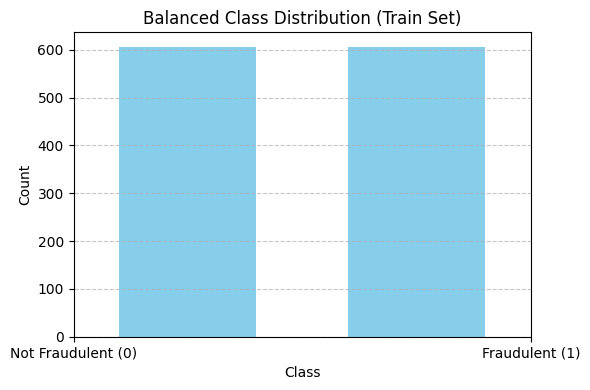

In [11]:
import matplotlib.pyplot as plt
from collections import Counter

# Print label distribution
print("Balanced training set label counts:", Counter(y_train_balanced))

# Create a histogram
plt.figure(figsize=(6, 4))
plt.hist(y_train_balanced, bins=2, rwidth=0.6, color='skyblue')
plt.xticks([0, 1], ['Not Fraudulent (0)', 'Fraudulent (1)'])
plt.title("Balanced Class Distribution (Train Set)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [12]:
from transformers import BertTokenizer

# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize balanced training texts
train_encodings = tokenizer(
    X_train_balanced,
    padding='max_length', # ensures same length for all
    truncation=True,
    max_length=512,
    return_tensors='pt'
)

# Tokenize original unbalanced test texts
test_encodings = tokenizer(
    list(X_test),
    padding='max_length',
    truncation=True,
    max_length=512,
    return_tensors='pt'
)

# Tokenize original unbalanced val texts
val_encodings = tokenizer(
    list(X_val),
    padding='max_length',
    truncation=True,
    max_length=512,
    return_tensors='pt'
)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [13]:
# Sample index to inspect
sample_idx = 5

# Show token IDs
print("Input IDs:", train_encodings['input_ids'][sample_idx])

# Show attention mask
print("Attention Mask:", train_encodings['attention_mask'][sample_idx])

# Decode tokens back to text for readability
decoded_text = tokenizer.decode(train_encodings['input_ids'][sample_idx], skip_special_tokens=True)
print("Decoded Text:\n", decoded_text)

Input IDs: tensor([  101,  2188,  2241, 26854,  5939, 18136,  2102,  2850,  2696,  4443,
        26706,  4460,  2800,  2057,  2031,  2195, 16556,  2800,  1999,  2023,
         2181,  7414,  6694,  8889, 17788,  8889,  8889,  2566,  2733,  2057,
         2024,  6224,  2069,  7481,  2969, 18938, 21967,  2111,  2007,  1037,
         4792,  2000,  2147,  1999,  1996,  2188, 22868,  1998,  2951,  4443,
         2492,  2013,  1996,  7216,  1997,  2037,  2219,  5014,  1996,  6871,
        17362,  2323,  2022,  2012,  2560,  2324,  2086,  2214,  2007,  4274,
         3229,  2053,  3325,  2003,  2734,  2174,  1996,  2206,  4813,  2024,
        16166,  3937,  3274,  1998, 22868,  4813,  3754,  2000,  6297,  1998,
         6140, 15981,  3754,  2000,  3582,  7826,  2035,  2017,  2342,  2003,
         3229,  2000,  1996,  4274,  1998,  2017,  2064,  5589,  2023,  2003,
         2019,  4443,  2504,  2597,  1998,  2057,  3749,  2440,  3784,  2731,
         2017,  2079,  2025,  2342,  2151,  2569,  48

In [14]:
print(f"Length of encodings: {len(train_encodings['input_ids'])}")
print(f"Length of labels: {len(y_train_balanced)}")

Length of encodings: 1212
Length of labels: 1212


In [15]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel
from torch.optim import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

class TextDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        if isinstance(self.labels, (list, torch.Tensor)):
            item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        else:
            item['labels'] = torch.tensor(self.labels.iloc[idx], dtype=torch.long)
        return item

2025-06-08 16:11:45.403102: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749399105.577417      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749399105.629360      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [16]:
import torch
import torch.nn as nn
from transformers import BertModel

class BERTCNNClassifier(nn.Module):
    def __init__(self, bert_model_name='bert-base-uncased', num_classes=2):
        super(BERTCNNClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_name)

        self.conv1 = nn.Conv1d(in_channels=768, out_channels=256, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool1 = nn.MaxPool1d(kernel_size=2)

        self.conv2 = nn.Conv1d(in_channels=256, out_channels=128, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool1d(kernel_size=2)

        self.dropout = nn.Dropout(0.3)

        # Calculate flattened size after conv and pooling
        with torch.no_grad():
            dummy_input = torch.zeros(1, 768, 512)  # batch=1, channels=768, seq_len=512
            x = self.relu(self.conv1(dummy_input))
            x = self.pool1(x)
            x = self.relu(self.conv2(x))
            x = self.pool2(x)
            self.flattened_size = x.numel()  # total number of features

        self.fc = nn.Linear(self.flattened_size, num_classes)

    def forward(self, input_ids, attention_mask):
        x = self.bert(input_ids=input_ids, attention_mask=attention_mask).last_hidden_state
        x = x.permute(0, 2, 1)  # (batch, channels, seq_len)

        x = self.relu(self.conv1(x))
        x = self.pool1(x)

        x = self.relu(self.conv2(x))
        x = self.pool2(x)

        x = torch.flatten(x, start_dim=1)  # flatten except batch dim

        x = self.dropout(x)
        return self.fc(x)




class BERTLSTMClassifier(nn.Module):
    def __init__(self, bert_model_name='bert-base-uncased', hidden_size=256, num_classes=2, num_layers=1, bidirectional=True):
        super(BERTLSTMClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_name)
        self.lstm = nn.LSTM(input_size=768, hidden_size=hidden_size, num_layers=num_layers,
                            batch_first=True, bidirectional=bidirectional)
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(hidden_size * 2 if bidirectional else hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        x = self.bert(input_ids=input_ids, attention_mask=attention_mask).last_hidden_state
        x, _ = self.lstm(x)
        x = self.dropout(x[:, -1, :])
        return self.fc(x)


class BERTCNNLSTMClassifier(nn.Module):
    def __init__(self, bert_model_name='bert-base-uncased', num_classes=2,
                 cnn_out_channels1=256, cnn_out_channels2=128,
                 lstm_hidden_size=128, num_layers=1, bidirectional=True):
        super(BERTCNNLSTMClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_name)

        # First conv block
        self.conv1 = nn.Conv1d(in_channels=768, out_channels=cnn_out_channels1, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool1 = nn.MaxPool1d(kernel_size=2)

        # Second conv block
        self.conv2 = nn.Conv1d(in_channels=cnn_out_channels1, out_channels=cnn_out_channels2, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool1d(kernel_size=2)

        self.lstm = nn.LSTM(input_size=cnn_out_channels2, hidden_size=lstm_hidden_size, num_layers=num_layers,
                            batch_first=True, bidirectional=bidirectional)
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(lstm_hidden_size * 2 if bidirectional else lstm_hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        x = self.bert(input_ids=input_ids, attention_mask=attention_mask).last_hidden_state

        x = x.permute(0, 2, 1)  # (batch, channels, seq_len)

        x = self.relu(self.conv1(x))
        x = self.pool1(x)

        x = self.relu(self.conv2(x))
        x = self.pool2(x)

        x = x.permute(0, 2, 1)  # back to (batch, seq_len, channels) for LSTM

        x, _ = self.lstm(x)
        x = self.dropout(x[:, -1, :])
        return self.fc(x)



In [17]:
train_dataset = TextDataset(train_encodings, y_train_balanced)
val_dataset = TextDataset(val_encodings, y_val)
test_dataset = TextDataset(test_encodings, y_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)

In [18]:
import torch
import torch.nn as nn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

def train_model_with_val_earlystopping(model, train_loader, val_loader, criterion, optimizer, device,
                                       num_epochs=10, patience=3, max_batches_per_epoch=None, plot_losses=True):
    model.to(device)
    best_val_loss = float('inf')
    patience_counter = 0
    history = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        all_preds_train, all_labels_train = [], []

        for i, batch in enumerate(train_loader):
            if max_batches_per_epoch and i >= max_batches_per_epoch:
                break

            optimizer.zero_grad()
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask)
            if isinstance(outputs, tuple):
                outputs = outputs[0]

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            preds = torch.argmax(outputs, dim=1).detach().cpu().numpy()
            all_preds_train.extend(preds)
            all_labels_train.extend(labels.detach().cpu().numpy())

        avg_train_loss = train_loss / (i + 1)
        train_acc = accuracy_score(all_labels_train, all_preds_train)

        # Validation
        model.eval()
        val_loss = 0.0
        all_preds_val, all_labels_val = [], []
        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)

                outputs = model(input_ids, attention_mask)
                if isinstance(outputs, tuple):
                    outputs = outputs[0]

                loss = criterion(outputs, labels)
                val_loss += loss.item()

                preds = torch.argmax(outputs, dim=1).cpu().numpy()
                all_preds_val.extend(preds)
                all_labels_val.extend(labels.cpu().numpy())

        avg_val_loss = val_loss / len(val_loader)
        val_acc = accuracy_score(all_labels_val, all_preds_val)
        val_f1 = f1_score(all_labels_val, all_preds_val, average='macro')
        val_prec = precision_score(all_labels_val, all_preds_val, average='macro')
        val_rec = recall_score(all_labels_val, all_preds_val, average='macro')

        print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f} | "
              f"Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f} | Val F1: {val_f1:.4f}")

        history.append({
            'epoch': epoch + 1,
            'train_loss': avg_train_loss,
            'train_acc': train_acc,
            'val_loss': avg_val_loss,
            'val_acc': val_acc,
            'val_precision': val_prec,
            'val_recall': val_rec,
            'val_f1': val_f1
        })

        # Early stopping
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            patience_counter = 0
            torch.save(model.state_dict(), 'best_model.pth')
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

    return history


## CNN

In [19]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

criterion = nn.CrossEntropyLoss()

# Initialize your model, e.g., BERTCNNClassifier
cnn_model = BERTCNNClassifier(num_classes=2)
cnn_model.to(device)

optimizer = torch.optim.Adam(cnn_model.parameters(), lr=2e-5)

# Train with early stopping and validation monitoring
history_cnn = train_model_with_val_earlystopping(
    cnn_model, train_loader, val_loader, criterion, optimizer, device,
    num_epochs=10, patience=3
)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Epoch 1/10 | Train Loss: 0.6009 | Val Loss: 0.6819 | Train Acc: 0.6914 | Val Acc: 0.5597 | Val F1: 0.4362
Epoch 2/10 | Train Loss: 0.3346 | Val Loss: 0.1613 | Train Acc: 0.8705 | Val Acc: 0.9355 | Val F1: 0.7483
Epoch 3/10 | Train Loss: 0.1435 | Val Loss: 0.1116 | Train Acc: 0.9497 | Val Acc: 0.9530 | Val F1: 0.7869
Epoch 4/10 | Train Loss: 0.0605 | Val Loss: 0.2057 | Train Acc: 0.9843 | Val Acc: 0.9306 | Val F1: 0.7566
Epoch 5/10 | Train Loss: 0.0252 | Val Loss: 0.3474 | Train Acc: 0.9942 | Val Acc: 0.9012 | Val F1: 0.7104
Epoch 6/10 | Train Loss: 0.0136 | Val Loss: 0.3425 | Train Acc: 0.9983 | Val Acc: 0.9165 | Val F1: 0.7368
Early stopping at epoch 6


In [20]:
training_cnn = pd.DataFrame(history_cnn)
training_cnn

,epoch,train_loss,train_acc,val_loss,val_acc,val_precision,val_recall,val_f1
0,1,0.600860,0.691419,0.681943,0.559657,0.544890,0.743061,0.436208
1,2,0.334571,0.870462,0.161323,0.935496,0.698472,0.849298,0.748265
2,3,0.143538,0.949670,0.111625,0.953020,0.748229,0.843905,0.786888
3,4,0.060503,0.984323,0.205699,0.930649,0.697368,0.905154,0.756574
4,5,0.025242,0.994224,0.347424,0.901193,0.657833,0.911578,0.710355
5,6,0.013576,0.998350,0.342462,0.916480,0.678141,0.923261,0.736790


In [21]:
import matplotlib.pyplot as plt

def plot_training_metrics(df):
    # Plot 1: Train vs Validation Loss
    plt.figure(figsize=(5, 3))
    plt.plot(df['epoch'], df['train_loss'], label='Train Loss', marker='o')
    plt.plot(df['epoch'], df['val_loss'], label='Validation Loss', marker='o')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Train vs Validation Loss per Epoch")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot 2: Validation Metrics
    plt.figure(figsize=(5, 3))
    plt.plot(df['epoch'], df['val_acc'], label='Validation Accuracy', marker='o')
    plt.plot(df['epoch'], df['val_precision'], label='Precision', marker='o')
    plt.plot(df['epoch'], df['val_recall'], label='Recall', marker='o')
    plt.plot(df['epoch'], df['val_f1'], label='F1 Score', marker='o')
    plt.xlabel("Epoch")
    plt.ylabel("Score")
    plt.title("Validation Metrics per Epoch")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot 3: Train Accuracy vs Validation Accuracy
    plt.figure(figsize=(5, 3))
    plt.plot(df['epoch'], df['train_acc'], label='Train Accuracy', marker='o')
    plt.plot(df['epoch'], df['val_acc'], label='Validation Accuracy', marker='o')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Train vs Validation Accuracy per Epoch")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


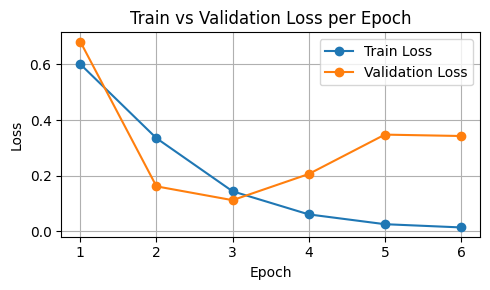

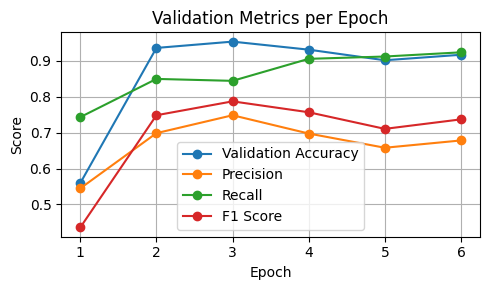

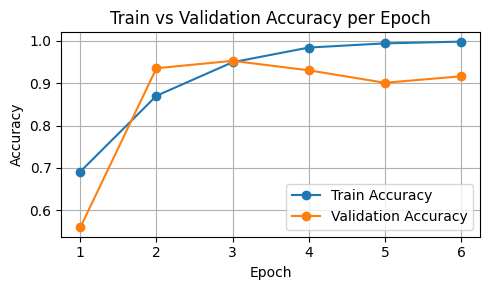

In [22]:
plot_training_metrics(training_cnn)

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

def evaluate_model(model, dataloader, device, class_names=None, print_metrics=True, plot_cm=True):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask)
            preds = torch.argmax(outputs, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Compute metrics
    acc = accuracy_score(all_labels, all_preds)
    prec = precision_score(all_labels, all_preds, average='macro')
    rec = recall_score(all_labels, all_preds, average='macro')
    f1 = f1_score(all_labels, all_preds, average='macro')
    cm = confusion_matrix(all_labels, all_preds)
    report = classification_report(all_labels, all_preds, target_names=class_names, digits=4)

    # Create a dataframe with metrics
    metrics_df = pd.DataFrame({
        'Accuracy': [acc],
        'Precision': [prec],
        'Recall': [rec],
        'F1-score': [f1]
    })

    if print_metrics:
        print(f"\nTest Evaluation:")
        print(metrics_df.to_string(index=False))
        print(f"\nConfusion Matrix:\n{cm}")
        print(f"\nClassification Report:\n{report}")

    if plot_cm:
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                    xticklabels=class_names, yticklabels=class_names)
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.title("Confusion Matrix")
        plt.tight_layout()
        plt.show()

    return metrics_df, cm, report




Test Evaluation:
 Accuracy  Precision   Recall  F1-score
 0.923565   0.690679 0.937934  0.752859

Confusion Matrix:
[[2353  199]
 [   6  124]]

Classification Report:
              precision    recall  f1-score   support

         Neg     0.9975    0.9220    0.9583      2552
         Pos     0.3839    0.9538    0.5475       130

    accuracy                         0.9236      2682
   macro avg     0.6907    0.9379    0.7529      2682
weighted avg     0.9677    0.9236    0.9383      2682



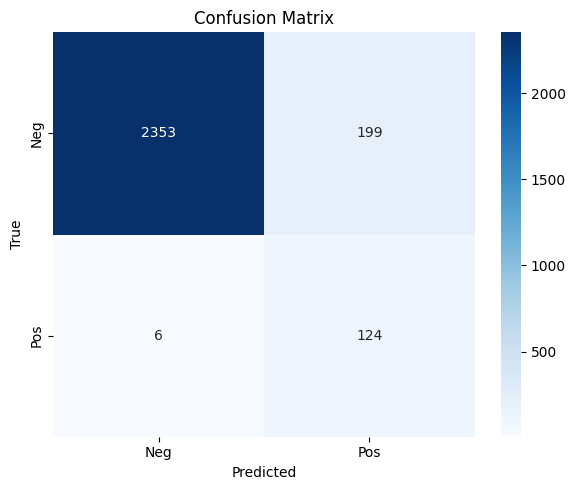

In [24]:
test_cnn, cm_cnn, cf_report_cnn= evaluate_model(cnn_model, test_loader, device, class_names=['Neg', 'Pos'])

In [25]:
print(cf_report_cnn)

              precision    recall  f1-score   support

         Neg     0.9975    0.9220    0.9583      2552
         Pos     0.3839    0.9538    0.5475       130

    accuracy                         0.9236      2682
   macro avg     0.6907    0.9379    0.7529      2682
weighted avg     0.9677    0.9236    0.9383      2682



## LSTM

In [26]:
# Initialize your model, e.g., BERTLSTMClassifier
lstm_model = BERTLSTMClassifier(num_classes=2)
lstm_model.to(device)

optimizer = torch.optim.Adam(lstm_model.parameters(), lr=2e-5)

# Train with early stopping and validation monitoring
history_lstm = train_model_with_val_earlystopping(
    lstm_model, train_loader, val_loader, criterion, optimizer, device,
    num_epochs=10, patience=3
)

Epoch 1/10 | Train Loss: 0.5910 | Val Loss: 0.3292 | Train Acc: 0.6815 | Val Acc: 0.8863 | Val F1: 0.6530
Epoch 2/10 | Train Loss: 0.3090 | Val Loss: 0.2986 | Train Acc: 0.8812 | Val Acc: 0.8814 | Val F1: 0.6715
Epoch 3/10 | Train Loss: 0.1621 | Val Loss: 0.2221 | Train Acc: 0.9455 | Val Acc: 0.9128 | Val F1: 0.7139
Epoch 4/10 | Train Loss: 0.0792 | Val Loss: 0.2487 | Train Acc: 0.9728 | Val Acc: 0.9139 | Val F1: 0.7259
Epoch 5/10 | Train Loss: 0.0324 | Val Loss: 0.2510 | Train Acc: 0.9934 | Val Acc: 0.9262 | Val F1: 0.7431
Epoch 6/10 | Train Loss: 0.0329 | Val Loss: 0.2980 | Train Acc: 0.9901 | Val Acc: 0.9150 | Val F1: 0.7257
Early stopping at epoch 6


In [27]:
training_lstm = pd.DataFrame(history_lstm)
training_lstm

,epoch,train_loss,train_acc,val_loss,val_acc,val_precision,val_recall,val_f1
0,1,0.590979,0.681518,0.329247,0.886279,0.617260,0.790584,0.653021
1,2,0.309015,0.881188,0.298628,0.881432,0.630406,0.864691,0.671514
2,3,0.162080,0.945545,0.222065,0.912752,0.662650,0.866548,0.713878
3,4,0.079163,0.972772,0.248658,0.913870,0.670526,0.899988,0.725901
4,5,0.032424,0.993399,0.251015,0.926174,0.686795,0.888202,0.743142
5,6,0.032926,0.990099,0.297953,0.914989,0.670778,0.893275,0.725681


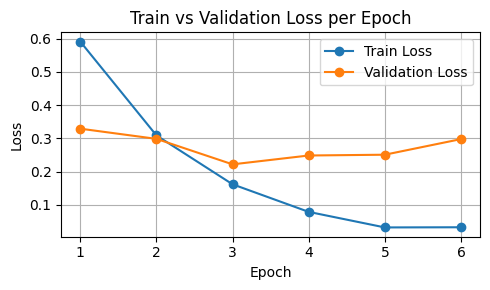

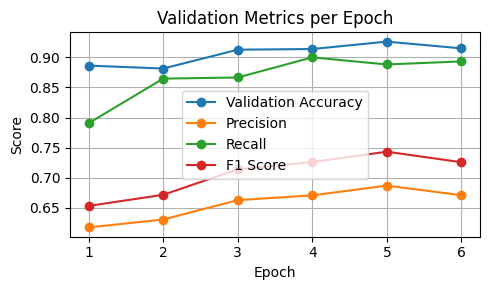

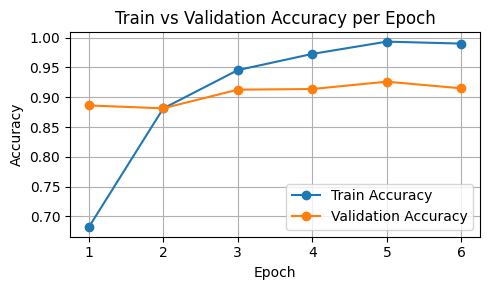

In [28]:
plot_training_metrics(training_lstm)


Test Evaluation:
 Accuracy  Precision   Recall  F1-score
 0.926174   0.687408 0.891853  0.744261

Confusion Matrix:
[[2373  179]
 [  19  111]]

Classification Report:
              precision    recall  f1-score   support

         Neg     0.9921    0.9299    0.9600      2552
         Pos     0.3828    0.8538    0.5286       130

    accuracy                         0.9262      2682
   macro avg     0.6874    0.8919    0.7443      2682
weighted avg     0.9625    0.9262    0.9390      2682



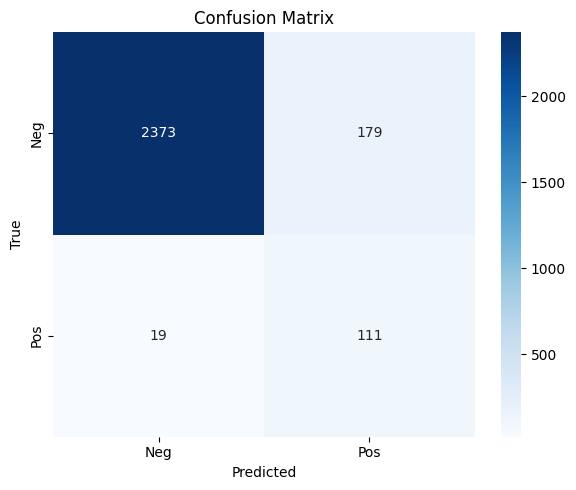

In [29]:
test_lstm, cm_lstm,cf_report_lstm = evaluate_model(lstm_model, test_loader, device, class_names=['Neg', 'Pos'])

In [30]:
print(cf_report_lstm)

              precision    recall  f1-score   support

         Neg     0.9921    0.9299    0.9600      2552
         Pos     0.3828    0.8538    0.5286       130

    accuracy                         0.9262      2682
   macro avg     0.6874    0.8919    0.7443      2682
weighted avg     0.9625    0.9262    0.9390      2682



## CNN-LSTM

In [31]:
# Initialize your model, e.g., BERTCNNLSTMClassifier
cnnlstm_model = BERTCNNLSTMClassifier(num_classes=2)
cnnlstm_model.to(device)

optimizer = torch.optim.Adam(cnnlstm_model.parameters(), lr=2e-5)

# Train with early stopping and validation monitoring
history_cnnlstm = train_model_with_val_earlystopping(
    cnnlstm_model, train_loader, val_loader, criterion, optimizer, device,
    num_epochs=10, patience=3
)

Epoch 1/10 | Train Loss: 0.6527 | Val Loss: 0.4882 | Train Acc: 0.6477 | Val Acc: 0.7685 | Val F1: 0.5480
Epoch 2/10 | Train Loss: 0.4511 | Val Loss: 0.2332 | Train Acc: 0.8234 | Val Acc: 0.9251 | Val F1: 0.7201
Epoch 3/10 | Train Loss: 0.2377 | Val Loss: 0.2353 | Train Acc: 0.9266 | Val Acc: 0.9150 | Val F1: 0.7279
Epoch 4/10 | Train Loss: 0.1428 | Val Loss: 0.1404 | Train Acc: 0.9604 | Val Acc: 0.9500 | Val F1: 0.7896
Epoch 5/10 | Train Loss: 0.0889 | Val Loss: 0.2210 | Train Acc: 0.9736 | Val Acc: 0.9292 | Val F1: 0.7468
Epoch 6/10 | Train Loss: 0.0489 | Val Loss: 0.1730 | Train Acc: 0.9901 | Val Acc: 0.9534 | Val F1: 0.8010
Epoch 7/10 | Train Loss: 0.0527 | Val Loss: 0.1971 | Train Acc: 0.9860 | Val Acc: 0.9441 | Val F1: 0.7823
Early stopping at epoch 7


In [32]:
training_cnnlstm = pd.DataFrame(history_cnnlstm)
training_cnnlstm

,epoch,train_loss,train_acc,val_loss,val_acc,val_precision,val_recall,val_f1
0,1,0.652709,0.647690,0.488197,0.768456,0.560233,0.746922,0.548026
1,2,0.451116,0.823432,0.233151,0.925056,0.673305,0.825561,0.720117
2,3,0.237733,0.926568,0.235309,0.914989,0.672119,0.900576,0.727855
3,4,0.142844,0.960396,0.140421,0.950037,0.739777,0.875190,0.789605
4,5,0.088950,0.973597,0.220999,0.929157,0.691080,0.882469,0.746849
5,6,0.048872,0.990099,0.173010,0.953393,0.751051,0.884254,0.801005
6,7,0.052682,0.985974,0.197057,0.944072,0.725072,0.897607,0.782279


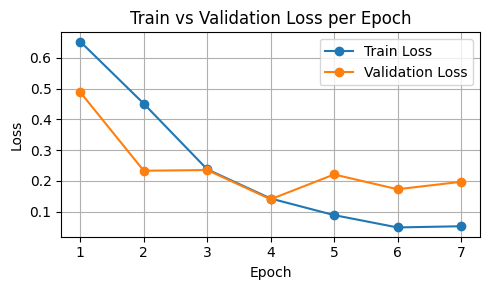

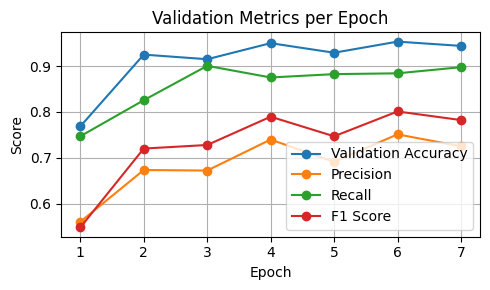

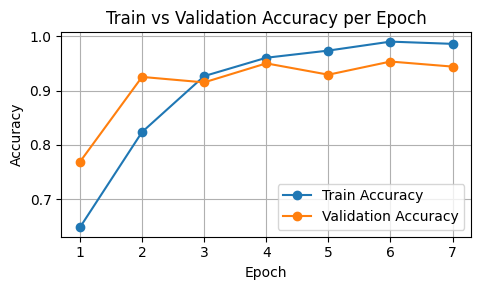

In [33]:
plot_training_metrics(training_cnnlstm)


Test Evaluation:
 Accuracy  Precision   Recall  F1-score
 0.956749   0.762952 0.904268  0.815846

Confusion Matrix:
[[2456   96]
 [  20  110]]

Classification Report:
              precision    recall  f1-score   support

         Neg     0.9919    0.9624    0.9769      2552
         Pos     0.5340    0.8462    0.6548       130

    accuracy                         0.9567      2682
   macro avg     0.7630    0.9043    0.8158      2682
weighted avg     0.9697    0.9567    0.9613      2682



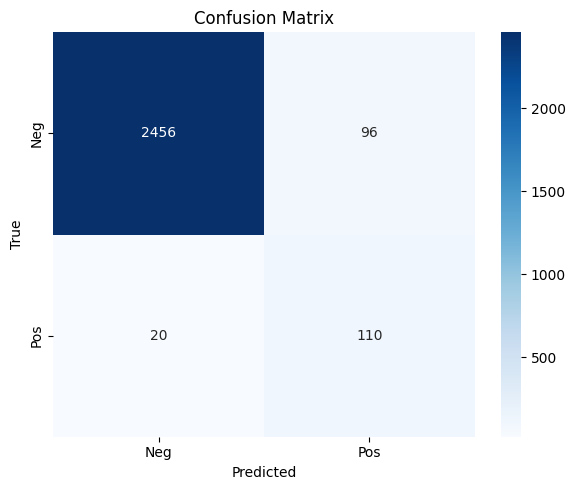

In [34]:
test_cnnlstm, cm_cnnlstm,cf_report_cnnlstm = evaluate_model(cnnlstm_model, test_loader, device, class_names=['Neg', 'Pos'])

In [35]:
print(cf_report_cnnlstm)

              precision    recall  f1-score   support

         Neg     0.9919    0.9624    0.9769      2552
         Pos     0.5340    0.8462    0.6548       130

    accuracy                         0.9567      2682
   macro avg     0.7630    0.9043    0.8158      2682
weighted avg     0.9697    0.9567    0.9613      2682



In [36]:
# Assign model names to each DataFrame
test_cnn['model'] = 'CNN'
test_lstm['model'] = 'LSTM'
test_cnnlstm['model'] = 'CNN-LSTM'

# Concatenate and reset index
stat = pd.concat([test_cnn, test_lstm, test_cnnlstm], axis=0).reset_index(drop=True)
stat

,Accuracy,Precision,Recall,F1-score,model
0,0.923565,0.690679,0.937934,0.752859,CNN
1,0.926174,0.687408,0.891853,0.744261,LSTM
2,0.956749,0.762952,0.904268,0.815846,CNN-LSTM


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

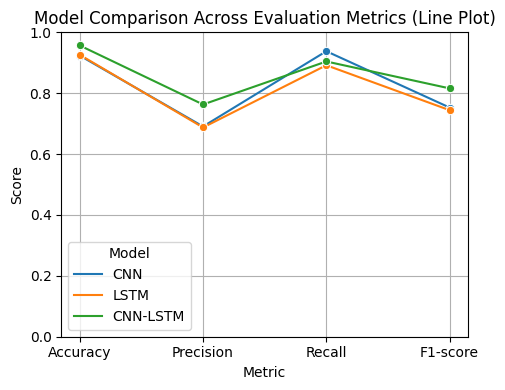

In [37]:
stat_melted = stat.melt(id_vars='model',
                        value_vars=['Accuracy', 'Precision', 'Recall', 'F1-score'],
                        var_name='Metric',
                        value_name='Score')

# Plot line chart
plt.figure(figsize=(5, 4))
sns.lineplot(data=stat_melted, x='Metric', y='Score', hue='model', marker='o')
plt.title("Model Comparison Across Evaluation Metrics (Line Plot)")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.ylim(0, 1)
plt.grid(True)
plt.legend(title="Model")
plt.tight_layout()
plt.show()